# Microsoft Movie Analysis

**Author:** Marissa Bush
***

## Overview

This EDA gives insight on what successful movie studios are doing well and what specific actions Microsoft can do to achieve similar aims.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

**Question 1: How many films have the top studios made from 2010-2019? In other words, what are the studios that will be Microsoft's biggest competition?**

**Question 2: Is there a positive correlation between film length and domestic gross?**

**Question 3: What are the most popular movie genres?**

## Data Understanding

Three sets of data were collected to answer these questions - box office mojo movie gross data, imdb title basics data, and imdb title ratings data.


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/marissabush/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load csv files
bom_mg_df = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
imdb_tr_df = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
imdb_tb_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')

**BOM Movie Gross Data**

In [3]:
# Function to get data frame info
def df_scope(bom_mg_df):
    #print name,.shape, .info, .describe
    for name, df in bom_mg_df.items():
        print('=' * 100)
        print(name)
        print(bom_mg_df.shape, '\n')
        print(bom_mg_df.info(), '\n')
        print(bom_mg_df.describe(include='all'))
df_scope(bom_mg_df)

title
(3387, 5) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None 

            title studio  domestic_gross foreign_gross         year
count        3387   3382    3.359000e+03          2037  3387.000000
unique       3386    257             NaN          1204          NaN
top     Bluebeard    IFC             NaN       1200000          NaN
freq            2    166             NaN            23          NaN
mean          NaN    NaN    2.874585e+07           NaN  2013.958075
std           NaN    NaN    6.698250e+07           NaN     2.478141
min           

In [4]:
# Set_index as 'title'
# bom_mg_df.set_index('title', inplace = True)
bom_mg_df.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


**IMDB Title Basics Data**

In [5]:
# Repeat function
def df_scope(imdb_tb_df):
    #print name,.shape, .info, .describe
    for name, df in imdb_tb_df.items():
        # What does the following code do?
        print('=' * 100)
        print(name)
        print(imdb_tb_df.shape, '\n')
        print(imdb_tb_df.info(), '\n')
        print(imdb_tb_df.describe(include='all'))
df_scope(imdb_tb_df)

tconst
(146144, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None 

           tconst primary_title original_title     start_year  \
count      146144        146144         146123  146144.000000   
unique     146144        136071         137773            NaN   
top     tt4862696          Home         Broken            NaN   
freq            1            24             19            NaN   
mean          NaN           NaN            NaN    2014.621798   
std           NaN           NaN   

           tconst primary_title original_title     start_year  \
count      146144        146144         146123  146144.000000   
unique     146144        136071         137773            NaN   
top     tt4862696          Home         Broken            NaN   
freq            1            24             19            NaN   
mean          NaN           NaN            NaN    2014.621798   
std           NaN           NaN            NaN       2.733583   
min           NaN           NaN            NaN    2010.000000   
25%           NaN           NaN            NaN    2012.000000   
50%           NaN           NaN            NaN    2015.000000   
75%           NaN           NaN            NaN    2017.000000   
max           NaN           NaN            NaN    2115.000000   

        runtime_minutes       genres  
count     114405.000000       140736  
unique              NaN         1085  
top                 NaN  Documentary  
freq                NaN        32185  
mean          86.187247 

**IMDB Title Ratings Data**

In [6]:
# Repeat function
def df_scope(imdb_tr_df):
    #print name,.shape, .info, .describe
    for name, df in imdb_tr_df.items():
        # What does the following code do???
        print('=' * 100)
        print(name)
        print(imdb_tr_df.shape, '\n')
        print(imdb_tr_df.info(), '\n')
        print(imdb_tr_df.describe(include='all'))
df_scope(imdb_tr_df)

tconst
(73856, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None 

           tconst  averagerating      numvotes
count       73856   73856.000000  7.385600e+04
unique      73856            NaN           NaN
top     tt5504474            NaN           NaN
freq            1            NaN           NaN
mean          NaN       6.332729  3.523662e+03
std           NaN       1.474978  3.029402e+04
min           NaN       1.000000  5.000000e+00
25%           NaN       5.500000  1.400000e+01
50%           NaN       6.500000  4.900000e+01
75%           NaN       7.400000  2.820000e+02
max           NaN      10.000000  1.841066e+06
averagerating
(7385

In [7]:
# Combine both IMDB data frames on common column
imdb_df = pd.merge(imdb_tr_df, imdb_tb_df, on='tconst', how='inner')
imdb_df.shape

(73856, 8)

In [8]:
imdb_df.head(2)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary


In [9]:
#imdb_df.set_index('title', inplace = True)
imdb_df.head(2)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary


**Combined Dateframe**

In [10]:
#bom_mg_df.rename(columns = {'year':'release_date'}, inplace = True)
imdb_df.rename(columns = {'primary_title':'title'}, inplace = True)

In [11]:
bom_mg_df.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [12]:
imdb_df.tail(2)

,tconst,averagerating,numvotes,title,original_title,start_year,runtime_minutes,genres
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary
73855,tt9894098,6.3,128,Sathru,Sathru,2019,129.0,Thriller


In [13]:
# Merge both data frames on common column, 'title'
df = imdb_df.merge(bom_mg_df, on = ['title'], how = 'inner')
df.head(2)

,tconst,averagerating,numvotes,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000,2013


In [14]:
df.shape

(3027, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   averagerating    3027 non-null   float64
 2   numvotes         3027 non-null   int64  
 3   title            3027 non-null   object 
 4   original_title   3027 non-null   object 
 5   start_year       3027 non-null   int64  
 6   runtime_minutes  2980 non-null   float64
 7   genres           3020 non-null   object 
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   object 
 11  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


## Data Preparation

To begin the data cleaning process I chose to examine and drop any duplicates in the two columns, 'tconst' and 'original_title'. Then find all missing values, check the percentages and drop those, as well. 

In [16]:
# Check for duplicates and missing values for combined df

In [17]:
df.head(2)

,tconst,averagerating,numvotes,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000,2013


In [18]:
df['tconst'].duplicated().sum()

2

In [19]:
df.drop_duplicates(subset=['tconst'], inplace = True)
df.shape

(3025, 12)

In [20]:
df['original_title'].duplicated().sum()

298

In [21]:
df.drop_duplicates(subset = ['original_title'], inplace = True)
df.shape

(2727, 12)

In [22]:
# Find missing values
df.isnull().sum().sort_values(ascending=False)

foreign_gross      1091
runtime_minutes      22
domestic_gross       17
genres                5
studio                3
year                  0
start_year            0
original_title        0
title                 0
numvotes              0
averagerating         0
tconst                0
dtype: int64

In [23]:
len(df)
df.isnull().sum().sort_values(ascending = False)/len(df)

foreign_gross      0.400073
runtime_minutes    0.008067
domestic_gross     0.006234
genres             0.001834
studio             0.001100
year               0.000000
start_year         0.000000
original_title     0.000000
title              0.000000
numvotes           0.000000
averagerating      0.000000
tconst             0.000000
dtype: float64

In [24]:
# Drop unnecessary columns
df.drop('foreign_gross', axis = 1, inplace = True)
df.drop('tconst', axis = 1, inplace = True)
df.drop('year', axis = 1, inplace = True)
df.drop('original_title', axis = 1, inplace = True)

In [25]:
# rename column
df.rename(columns = {'start_year':'release_date'}, inplace = True)

In [26]:
df.head(2)

,averagerating,numvotes,title,release_date,runtime_minutes,genres,studio,domestic_gross
0,4.2,50352,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0
1,5.1,8296,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0


In [27]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

runtime_minutes    22
domestic_gross     17
genres              5
studio              3
release_date        0
title               0
numvotes            0
averagerating       0
dtype: int64

In [28]:
# Check for percentage missing
df.isnull().sum().sort_values(ascending = False)/len(df)

runtime_minutes    0.008067
domestic_gross     0.006234
genres             0.001834
studio             0.001100
release_date       0.000000
title              0.000000
numvotes           0.000000
averagerating      0.000000
dtype: float64

In [29]:
# Drop missing values from columns
df.dropna(subset=['genres', 'runtime_minutes', 'domestic_gross', 'studio'], inplace=True)
df.shape

(2683, 8)

In [30]:
# Double check for missing values
df.isnull().sum().sort_values(ascending=False)

domestic_gross     0
studio             0
genres             0
runtime_minutes    0
release_date       0
title              0
numvotes           0
averagerating      0
dtype: int64

In [31]:
df.describe()

,averagerating,numvotes,release_date,runtime_minutes,domestic_gross
count,2683.000000,2.683000e+03,2683.000000,2683.000000,2.683000e+03
mean,6.486545,6.653972e+04,2013.751025,108.044726,3.027196e+07
std,0.962640,1.302484e+05,2.441232,19.484201,6.709432e+07
min,1.600000,5.000000e+00,2010.000000,25.000000,1.000000e+02
25%,6.000000,3.345500e+03,2012.000000,95.000000,1.260000e+05
50%,6.600000,1.561200e+04,2014.000000,105.000000,1.800000e+06
75%,7.200000,7.119100e+04,2016.000000,119.000000,3.120000e+07
max,8.900000,1.841066e+06,2019.000000,272.000000,7.001000e+08


<AxesSubplot:xlabel='runtime_minutes'>

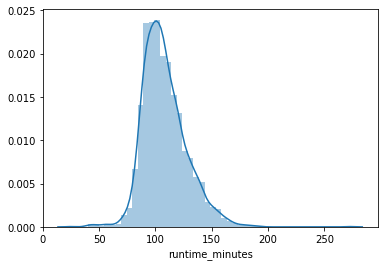

In [32]:
# Check for outliers
sns.distplot(df['runtime_minutes'])

In [33]:
# Remove outliers
df = df[df.runtime_minutes != 272]
df = df[df.runtime_minutes != 25]

## Data Modeling 

**Question 1:  How many films have the top studios made from 2010-2019, and which studio brings in the most earnings? In other words, what are the studios that will be Microsoft's biggest competition?**

In [34]:
df.head(2)

,averagerating,numvotes,title,release_date,runtime_minutes,genres,studio,domestic_gross
0,4.2,50352,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0
1,5.1,8296,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0


In [35]:
# How many films per studio
top_studios = df['studio'].value_counts().head(10)

In [36]:
top_studios

IFC      133
Uni.     131
Fox      121
Magn.    108
WB       107
SPC       99
BV        86
Sony      82
LGF       80
Par.      80
Name: studio, dtype: int64

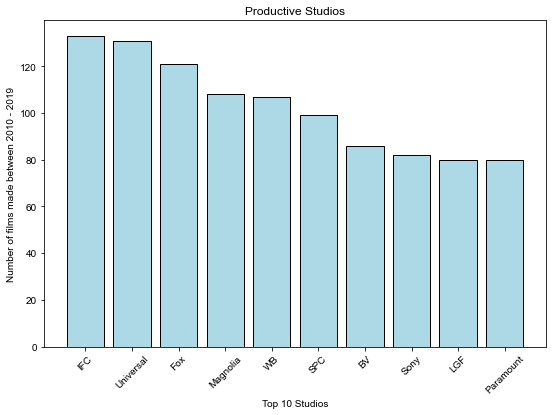

In [37]:
# Bar graph of top 10 studios and number of movies made
studio = ['IFC', 'Universal', 'Fox', 'Magnolia', 'WB', 'SPC', 'BV', 'Sony', 'LGF', 'Paramount']
num_film = [133, 131, 121, 108, 107, 99, 86, 82, 80, 80]

plt.figure(figsize=(9,6))

plt.bar(x= studio,
 
        height= num_film,
        
       color = 'lightblue', edgecolor = 'black')

plt.xlabel('Top 10 Studios')
plt.ylabel('Number of films made between 2010 - 2019')
plt.xticks(rotation=45)
plt.title('Productive Studios')

sns.set();

In [38]:
# Group top studios and their domestic gross sum
studio_gross = df.groupby('studio').domestic_gross.sum().sort_values(ascending = False).head(10)
studio_gross

studio
BV         1.474870e+10
Uni.       1.152670e+10
Fox        9.853700e+09
WB         9.415000e+09
Sony       6.809846e+09
Par.       6.517213e+09
WB (NL)    3.962400e+09
LGF        3.440950e+09
P/DW       1.682900e+09
Wein.      1.485199e+09
Name: domestic_gross, dtype: float64

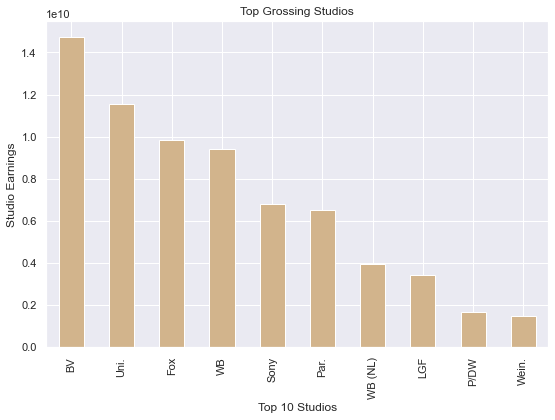

In [39]:
# Bar graph of studios and domestic gross sum
studio_gross.plot.bar(figsize=(9,6), color = 'tan', 
                      edgecolor = 'white'
                     )
plt.xlabel('Top 10 Studios')
plt.ylabel('Studio Earnings')
plt.title('Top Grossing Studios')
sns.set();

The most productive studios from 2010-2019 have made over 80 films in that time with Buena Vista studios bringing in the highest earnings.


**Question 2: Is there a correlation between film length and domestic gross?**

In [40]:
df['domestic_gross'].describe()

count    2.681000e+03
mean     3.027515e+07
std      6.711552e+07
min      1.000000e+02
25%      1.260000e+05
50%      1.800000e+06
75%      3.120000e+07
max      7.001000e+08
Name: domestic_gross, dtype: float64

<Figure size 648x432 with 0 Axes>

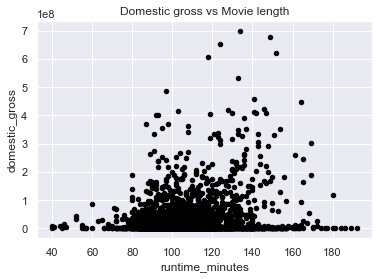

In [48]:
# Scatter plot of domestic gross vs movie length
plt.figure(figsize = (9, 6))
df.plot.scatter(x = 'runtime_minutes', y = 'domestic_gross', color = 'black')
plt.title("Domestic gross vs Movie length")

plt.show()

sns.set();


It looks like this shows the higher grossing films were in the 2 - 2.5 hour range. Perhaps making a film that length would be a good move.

**Question 3: What are the most popular movie genres?**

In [42]:
df.head(1)

,averagerating,numvotes,title,release_date,runtime_minutes,genres,studio,domestic_gross
0,4.2,50352,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0


In [43]:
# Organize genres by first genre in string - for simplification
df['new_genres'] = df['genres'].str.split(pat=",").str[0]
df['new_genres'].value_counts()

Drama          677
Action         592
Comedy         569
Biography      227
Adventure      203
Documentary    128
Crime          116
Horror          84
Animation       35
Thriller        18
Fantasy         11
Romance          8
Mystery          8
Family           2
Sport            1
Sci-Fi           1
Music            1
Name: new_genres, dtype: int64

In [44]:
# Group the data by genres
df.groupby('new_genres').sum()

,averagerating,numvotes,release_date,runtime_minutes,domestic_gross
new_genres,,,,,
Action,3751.5,76494734,1192261,68654.0,3.653866e+10
Adventure,1319.1,20258369,408849,21020.0,1.475267e+10
Animation,238.7,1524793,70493,3339.0,9.411647e+08
Biography,1589.0,14129553,457249,25461.0,4.291921e+09
Comedy,3547.9,25024900,1145600,59980.0,1.132005e+10
Crime,776.9,7325512,233595,13067.0,1.469601e+09
Documentary,929.0,646155,257718,11595.0,1.092938e+09
Drama,4470.5,25172473,1363243,73239.0,7.027175e+09
Family,12.7,145,4033,182.0,1.398400e+07


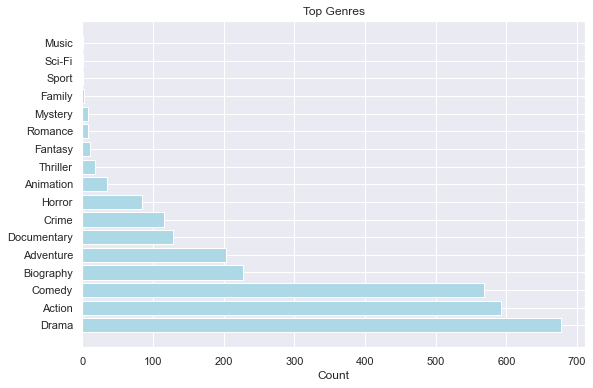

In [53]:
# Horizontal Bar chart
fig, ax = plt.subplots(figsize = (9,6))

genre_types = df['new_genres'].value_counts()

ax.barh(y=genre_types.index, 
    width=genre_types.values, color = 'lightblue', edgecolor = 'white'
)
ax.set_xlabel('Count')
ax.set_title('Top Genres')
sns.set();

Results show drama, action, and comedy are the most frequently made movies.

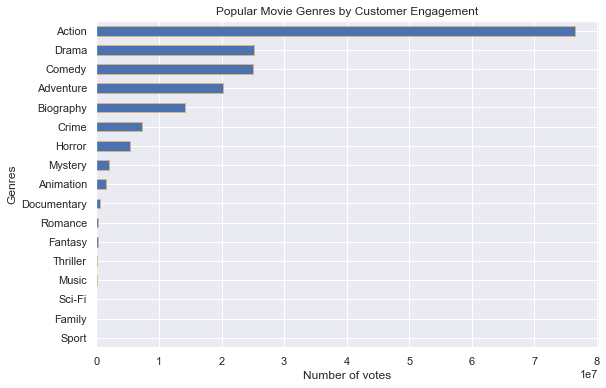

In [51]:
# Graph by genre and number of votes - or number of customer interaction
df.groupby(['new_genres'])['numvotes'].sum().sort_values().plot(kind='barh', figsize=(9,6), edgecolor = 'tan')
plt.title('Popular Movie Genres by Customer Engagement')
plt.xlabel("Number of votes")
plt.ylabel('Genres')
sns.set();

Results show that action films result in a lot more online engagement compared the other genres. 

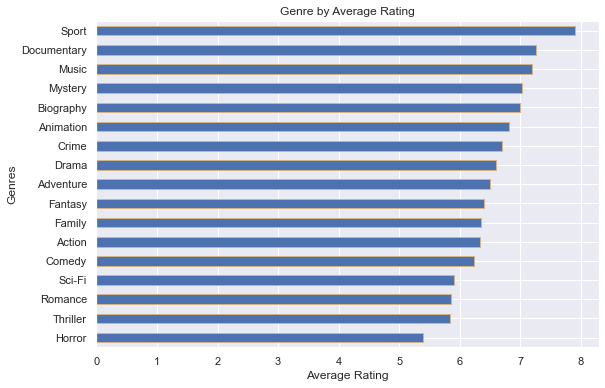

In [52]:
# Bar graph
df.groupby(['new_genres'])['averagerating'].mean().sort_values().plot(kind='barh',
                                                                      figsize=(9,6), edgecolor = 'tan')
plt.title("Genre by Average Rating")
plt.xlabel('Average Rating')
plt.ylabel('Genres')
sns.set();

Results seem to show that sport, documentary, and music come out as the top three genres with
the highest ratings. However, this would be inaccurate to conclude due the low number of votes
for those particular genres.

Looking at the previous three graphs, it looks like action, drama, and comedy genres are the most successful with audiences.

## Evaluation

The visualizations show that the top movie studios today are making over 80 films between 2010-2019 with an average of 8.8 films per year. The other visualization shows that movies that make a higher domestic gross are between 2 - 2.5 hours long. For the final visualizations, it looks like drama, action, and comedy are the most frequently made films with the action genre creating the most 'buzz'/customer engagement. 

## Conclusions

With all this in mind, I would recommend Microsoft to make a movie that is between 2 to 2.5 hours long and also to consider a film in the action, drama, or comedy genre. Additionally, I would recommend making about 8.8 films a year in order to compete with the top studios. This analysis has gaps due to the small data set and only including domestic gross as a measure of earnings. To improve this project, I would like to work with foreign gross and cost of production data to understand the bigger picture of potential earnings per film.